In [1]:
import numpy as np
import os
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from cp_detection.NeuralODE import GeneralModeDataset, LightningTrainer
from cp_detection.ForceSimulation import ForcedHarmonicOscillator,  SimulateGeneralMode
from cp_detection.InteractionForce import DMT_Maugis
import torch

## Define force model as well as QTF model to be used in simulating data

In [2]:
DMT = DMT_Maugis(0.2, 10, 2, 130, 1, 0.3, 0.3)
ode_params = {'Q':12000, 'A0':1, 'Om':1., 'k':1000}
FHO = ForcedHarmonicOscillator(**ode_params, force_model = DMT)
#FHO = ForcedHarmonicOscillator(**ode_params, force_model = Null)

## Simulate general mode approach curve data

## Load simulated data and train the model

In [3]:
#savepath = './Data/digital.json'
#savepath = './Data/prototype_fake_data.json'
#savepath = './Data/digital_snr=1000.json'
savepath = './Data/digital_fast.json'
hidden_nodes = torch.Tensor([50, 50, 50, 50])
train_dataset = GeneralModeDataset.load(savepath)

In [4]:
if torch.cuda.is_available:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [5]:
from argparse import Namespace
hparams = Namespace(**{'lr': 0.01, 'batch_size': 20, 'solver': 'rk4', 'fft_loss': False, 'train_dataset_path': savepath, 'hidden_nodes': hidden_nodes})
model = LightningTrainer(hparams)

In [6]:
for param in model.parameters():
    print(type(param.data), param.size())


<class 'torch.Tensor'> torch.Size([20])
<class 'torch.Tensor'> torch.Size([50, 1])
<class 'torch.Tensor'> torch.Size([50])
<class 'torch.Tensor'> torch.Size([50, 50])
<class 'torch.Tensor'> torch.Size([50])
<class 'torch.Tensor'> torch.Size([50, 50])
<class 'torch.Tensor'> torch.Size([50])
<class 'torch.Tensor'> torch.Size([50, 50])
<class 'torch.Tensor'> torch.Size([50])
<class 'torch.Tensor'> torch.Size([1, 50])
<class 'torch.Tensor'> torch.Size([1])


In [7]:
model.TrainModel(checkpoint_path = './checkpoints')

/home/jhko725/anaconda3/envs/TorchDiff/lib/python3.7/site-packages/pytorch_lightning/utilities/warnings.py:18: UserWarning: Checkpoint directory ./checkpoints exists and is not empty with save_top_k != 0.All files in this directory will be deleted when a checkpoint is saved!
  warnings.warn(*args, **kwargs)
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
  | Name            | Type          | Params
----------------------------------------------
0 | ODE             | AFM_NeuralODE | 7 K   
1 | ODE.Fc          | F_cons        | 7 K   
2 | ODE.Fc.layers   | ModuleList    | 7 K   
3 | ODE.Fc.layers.0 | Linear        | 100   
4 | ODE.Fc.layers.1 | Linear        | 2 K   
5 | ODE.Fc.layers.2 | Linear        | 2 K   
6 | ODE.Fc.layers.3 | Linear        | 2 K   
7 | ODE.Fc.layers.4 | Linear        | 51    
8 | ODE.Fc.elu      | ELU           | 0     
9 | ODE.Fc.tanh     | Tanh          | 0     


/home/jhko725/anaconda3/envs/TorchDiff/lib/python3.7/site-packages/pytorch_lightning/utilities/warnings.py:18: RuntimeWarning: Displayed epoch numbers in the progress bar start from "1" until v0.6.x, but will start from "0" in v0.8.0.
  warnings.warn(*args, **kwargs)
/home/jhko725/anaconda3/envs/TorchDiff/lib/python3.7/site-packages/pytorch_lightning/utilities/warnings.py:18: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
INFO:lightning:
Epoch 00000: loss reached 0.00009 (best 0.00009), saving model to ./checkpoints/epoch=0_v1.ckpt as top 1
INFO:lightning:
Epoch 00001: loss reached 0.00002 (best 0.00002), saving model to ./checkpoints/epoch=1_v0.ckpt as top 1
INFO:lightning:
Epoch 00002: loss reached 0.00001 (best 0.00001), saving model to ./checkpoints/epoch=2_v0.ckpt as top 1
INFO:lightning

INFO:lightning:
Epoch 00093: loss  was not in top 1
INFO:lightning:
Epoch 00094: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=94.ckpt as top 1
INFO:lightning:
Epoch 00095: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=95.ckpt as top 1
INFO:lightning:
Epoch 00096: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=96.ckpt as top 1
INFO:lightning:
Epoch 00097: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=97.ckpt as top 1
INFO:lightning:
Epoch 00098: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=98_v0.ckpt as top 1
INFO:lightning:
Epoch 00099: loss  was not in top 1
INFO:lightning:
Epoch 00100: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=100.ckpt as top 1
INFO:lightning:
Epoch 00101: loss  was not in top 1
INFO:lightning:
Epoch 00102: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=102.ckpt as top 1
INFO:l

INFO:lightning:
Epoch 00174: loss  was not in top 1
INFO:lightning:
Epoch 00175: loss  was not in top 1
INFO:lightning:
Epoch 00176: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=176.ckpt as top 1
INFO:lightning:
Epoch 00177: loss  was not in top 1
INFO:lightning:
Epoch 00178: loss  was not in top 1
INFO:lightning:
Epoch 00179: loss  was not in top 1
INFO:lightning:
Epoch 00180: loss  was not in top 1
INFO:lightning:
Epoch 00181: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=181.ckpt as top 1
INFO:lightning:
Epoch 00182: loss  was not in top 1
INFO:lightning:
Epoch 00183: loss  was not in top 1
INFO:lightning:
Epoch 00184: loss  was not in top 1
INFO:lightning:
Epoch 00185: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=185.ckpt as top 1
INFO:lightning:
Epoch 00186: loss reached 0.00000 (best 0.00000), saving model to ./checkpoints/epoch=186.ckpt as top 1
INFO:lightning:Detected KeyboardInterrupt, attemptin

## Load trained model, evaluate results

In [8]:
checkpoint_path = './checkpoints/epoch=186.ckpt'
#checkpoint_path = './hall_of_fame/20200206/_ckpt_epoch_319.ckpt'
model = LightningTrainer.LoadModel(checkpoint_path)

In [9]:
d_array = np.linspace(1, 10, 20)
model.cuda()
F_pred = model.predict_force(d_array)
z_array = np.zeros((2, d_array.size))
z_array[1, :] = d_array
F_true = DMT(z_array).flatten()

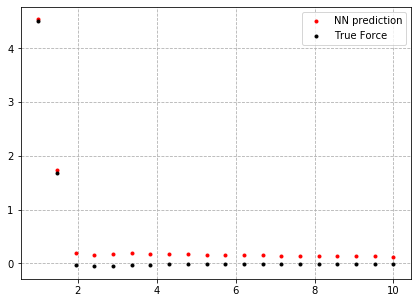

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.plot(d_array, F_pred, '.r', label = 'NN prediction')
ax.plot(d_array, F_true, '.k', label = 'True Force')
ax.legend()
ax.grid(ls = '--')

In [23]:
print(F_pred)

[[-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]
 [-0.42603335]]


In [15]:
model.train_dataset.d_array

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

## Deprecated

In [12]:
from torchviz import make_dot, make_dot_from_trace

# Remember that you can use make_dot, make_dot_from_trace to get a nice visualization of the model flow
# But this does need one epoch of forward propagation, which is extremely costly in the steady state model
# The corresponding script to remember is:
# make_dot(loss, params=dict(nnode.named_parameters()))